In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve, auc, f1_score, precision_score, recall_score

In [2]:
data = pd.read_table('XYZCorp_LendingData.txt',parse_dates=['issue_d'])

/Users/kranti4871/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (17,45,53) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,default_ind
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [4]:
data.shape

(855969, 73)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 855969 entries, 0 to 855968
Data columns (total 73 columns):
id                             855969 non-null int64
member_id                      855969 non-null int64
loan_amnt                      855969 non-null float64
funded_amnt                    855969 non-null float64
funded_amnt_inv                855969 non-null float64
term                           855969 non-null object
int_rate                       855969 non-null float64
installment                    855969 non-null float64
grade                          855969 non-null object
sub_grade                      855969 non-null object
emp_title                      806526 non-null object
emp_length                     812908 non-null object
home_ownership                 855969 non-null object
annual_inc                     855969 non-null float64
verification_status            855969 non-null object
issue_d                        855969 non-null datetime64[ns]
pymnt_plan   

In [6]:
data.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'pymnt_plan', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint',
       'verification_status_joint', 'acc_now_delinq', 'tot_col

In [7]:
data.isnull().sum()

id                       0
member_id                0
loan_amnt                0
funded_amnt              0
funded_amnt_inv          0
                     ...  
total_rev_hi_lim     67313
inq_fi              842681
total_cu_tl         842681
inq_last_12m        842681
default_ind              0
Length: 73, dtype: int64

In [8]:
# Removing Columns missing more than 700000
mis=data.isnull().sum()
for i in range(len(mis)):
    if mis[i]>700000:
        del data['{}'.format(mis.index[i])]

In [9]:
data.shape

(855969, 54)

In [10]:
#Removing Unwanted Columns
data= data.drop(['id','member_id'],axis=1)

In [11]:
data.shape

(855969, 52)

In [12]:
data.dtypes.value_counts()

float64           32
object            18
datetime64[ns]     1
int64              1
dtype: int64

# Dependent Variable

0    809502
1     46467
Name: default_ind, dtype: int64


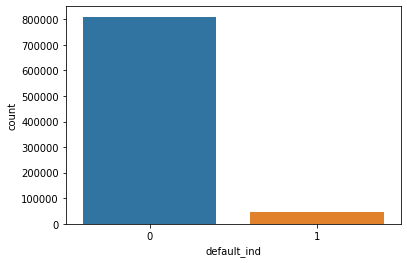

In [13]:
default_ind = data['default_ind'].value_counts()
print(default_ind)
sns.countplot('default_ind',data=data)

# Exploratory Data analysis

## Categorical Variables

### Term

 36 months    600221
 60 months    255748
Name: term, dtype: int64


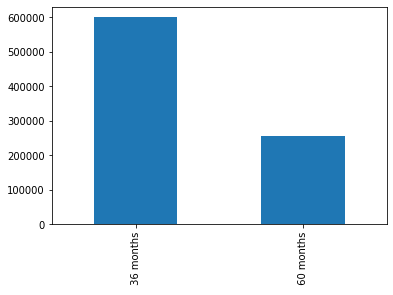

In [14]:
#term Count
Term_count = data['term'].value_counts()
print(Term_count)
Term_count.plot.bar()

term        default_ind
 36 months  0              570423
            1               29798
 60 months  0              239079
            1               16669
Name: default_ind, dtype: int64


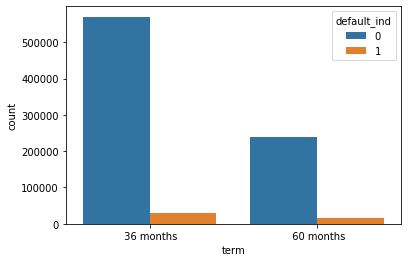

In [15]:
term_default = data.groupby('term')['default_ind'].value_counts(normalize=False)
print(term_default)
sns.countplot('term',hue='default_ind',data=data)

### Grade 

B    247998
C    236855
A    145665
D    132802
E     66448
F     21328
G      4873
Name: grade, dtype: int64


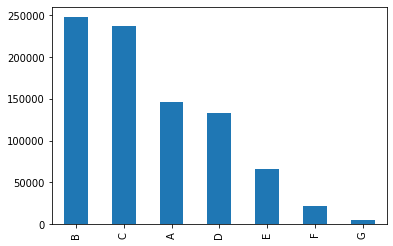

In [16]:
#grade Count
Grade_count = data['grade'].value_counts()
print(Grade_count)
Grade_count.plot.bar()

term        default_ind
 36 months  0              570423
            1               29798
 60 months  0              239079
            1               16669
Name: default_ind, dtype: int64


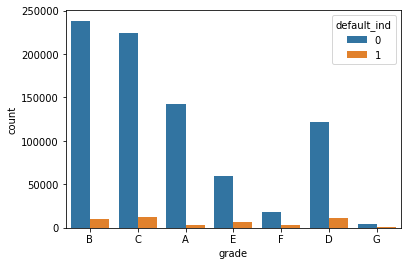

In [17]:
Grade_default = data.groupby('grade')['default_ind'].value_counts(normalize=False)
print(term_default)
sns.countplot('grade',hue='default_ind',data=data)

### Sub_Grade

B3    54958
B4    54116
C1    51588
C2    50457
C3    48337
B2    47589
B5    47333
C4    46941
B1    44002
A5    43957
C5    39532
D1    34667
A4    33991
D2    28385
D3    25289
D4    24253
A3    23095
A1    22516
A2    22106
D5    20208
E1    17230
E2    15994
E3    13294
E4    11011
E5     8919
F1     6702
F2     4979
F3     4099
F4     3168
F5     2380
G1     1698
G2     1259
G3      877
G4      570
G5      469
Name: sub_grade, dtype: int64


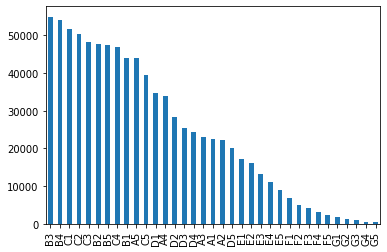

In [18]:
#grade Count
Sub_Grade_count = data['sub_grade'].value_counts()
print(Sub_Grade_count)
Sub_Grade_count.plot.bar()

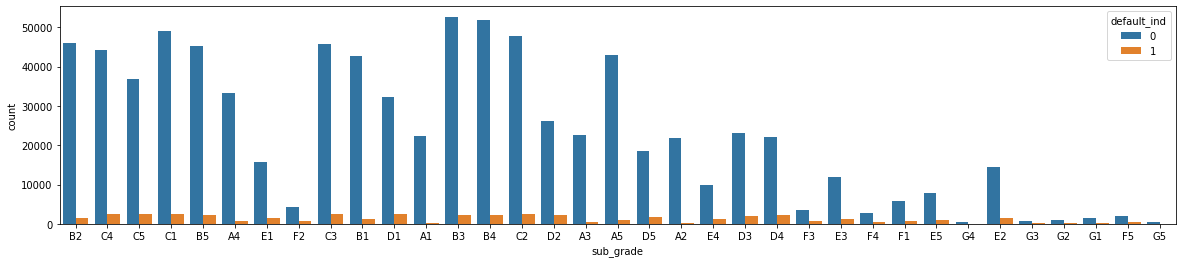

In [19]:
plt.figure(figsize=(20,4))
sns.countplot('sub_grade',data=data,hue='default_ind')

In [20]:
del data['sub_grade']

### Emp_Title 

In [21]:
data.emp_title.nunique()

290912

In [22]:
del data['emp_title']

### Emp_Length

10+ years    282090
2 years       75986
< 1 year      67597
3 years       67392
1 year        54855
5 years       53812
4 years       50643
7 years       43204
NaN           43061
8 years       42421
6 years       41446
9 years       33462
Name: emp_length, dtype: int64


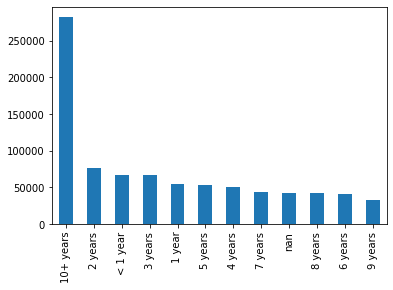

In [23]:
# emp_length Count
emp_length_count = data['emp_length'].value_counts(dropna=False)
print(emp_length_count)
emp_length_count.plot.bar()

In [24]:
## Imputing missing values with most repeated value
data['emp_length'].fillna(value=data['emp_length'].value_counts().index[0],axis=0,inplace=True)

10+ years    325151
2 years       75986
< 1 year      67597
3 years       67392
1 year        54855
5 years       53812
4 years       50643
7 years       43204
8 years       42421
6 years       41446
9 years       33462
Name: emp_length, dtype: int64


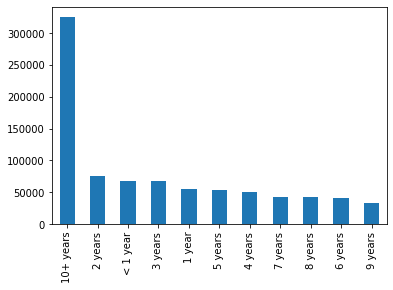

In [25]:
# emp_length Count
emp_length_count = data['emp_length'].value_counts(dropna=False)
print(emp_length_count)
emp_length_count.plot.bar()

emp_length  default_ind
1 year      0               51796
            1                3059
10+ years   0              309047
            1               16104
2 years     0               71867
            1                4119
3 years     0               63754
            1                3638
4 years     0               47802
            1                2841
5 years     0               50532
            1                3280
6 years     0               38688
            1                2758
7 years     0               40531
            1                2673
8 years     0               40194
            1                2227
9 years     0               31636
            1                1826
< 1 year    0               63655
            1                3942
Name: default_ind, dtype: int64


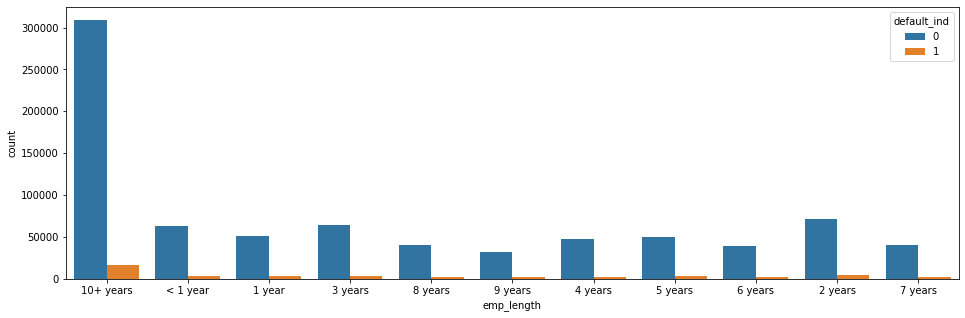

In [26]:
plt.figure(figsize=(16,5))
emp_length_default = data.groupby('emp_length')['default_ind'].value_counts()
print(emp_length_default)
sns.countplot('emp_length',data=data,hue='default_ind')

### Home_Ownership

MORTGAGE    429106
RENT        342535
OWN          84136
OTHER          144
NONE            45
ANY              3
Name: home_ownership, dtype: int64


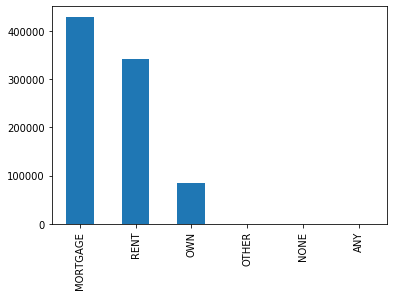

In [27]:
#home_ownership Count status
home_ownership_count = data['home_ownership'].value_counts()
print(home_ownership_count)
home_ownership_count.plot.bar()

home_ownership  default_ind
ANY             0                   3
MORTGAGE        0              408730
                1               20376
NONE            0                  38
                1                   7
OTHER           0                 117
                1                  27
OWN             0               80001
                1                4135
RENT            0              320613
                1               21922
Name: default_ind, dtype: int64


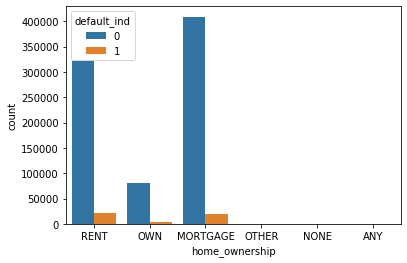

In [28]:
home_ownership_default = data.groupby('home_ownership')['default_ind'].value_counts()
print(home_ownership_default)
sns.countplot('home_ownership',data=data,hue='default_ind')

### Verification_Status

Source Verified    318178
Verified           280049
Not Verified       257742
Name: verification_status, dtype: int64


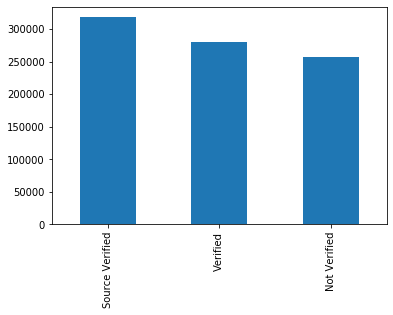

In [29]:
#verification_status Count status
verification_status_count = data['verification_status'].value_counts()
print(verification_status_count)
verification_status_count.plot.bar()

verification_status  default_ind
Not Verified         0              245256
                     1               12486
Source Verified      0              303976
                     1               14202
Verified             0              260270
                     1               19779
Name: default_ind, dtype: int64


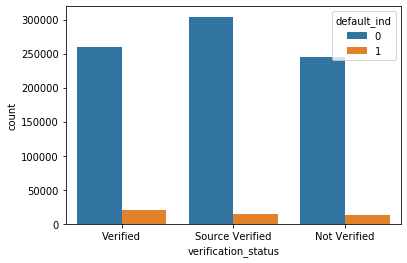

In [30]:
verification_status_default = data.groupby('verification_status')['default_ind'].value_counts()
print(verification_status_default)
sns.countplot('verification_status',data=data,hue='default_ind')

### Pymnt_plan

n    855964
y         5
Name: pymnt_plan, dtype: int64


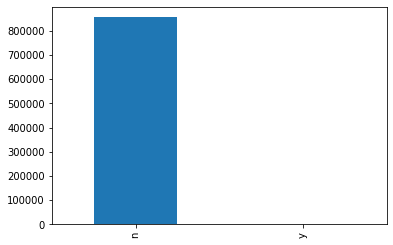

In [31]:
#pymnt_plan Count status
pymnt_plan_count = data['pymnt_plan'].value_counts()
print(pymnt_plan_count)
pymnt_plan_count.plot.bar()

In [32]:
del data['pymnt_plan']

### Purpose

debt_consolidation    505392
credit_card           200144
home_improvement       49956
other                  40949
major_purchase         16587
small_business          9785
car                     8593
medical                 8193
moving                  5160
vacation                4542
house                   3513
wedding                 2280
renewable_energy         549
educational              326
Name: purpose, dtype: int64


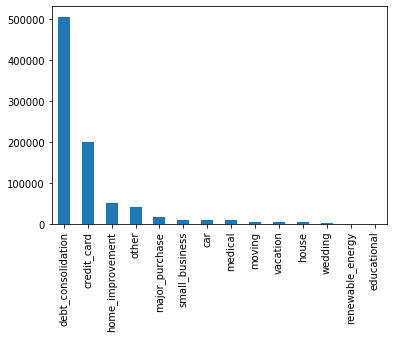

In [33]:
#purpose_status Count status
purpose_status_count = data['purpose'].value_counts()
print(purpose_status_count)
purpose_status_count.plot.bar()

purpose             default_ind
car                 0                8135
                    1                 458
credit_card         0              192085
                    1                8059
debt_consolidation  0              477003
                    1               28389
educational         0                 270
                    1                  56
home_improvement    0               47640
                    1                2316
house               0                3220
                    1                 293
major_purchase      0               15699
                    1                 888
medical             0                7609
                    1                 584
moving              0                4724
                    1                 436
other               0               37948
                    1                3001
renewable_energy    0                 495
                    1                  54
small_business      0                8395
  

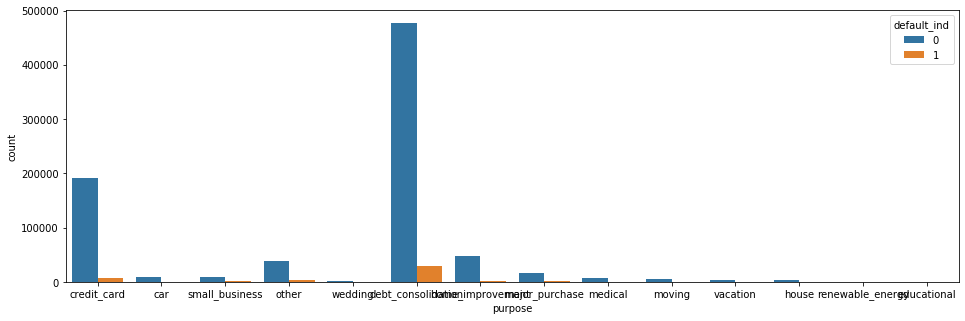

In [34]:
plt.figure(figsize=(16,5))
purpose_default = data.groupby('purpose')['default_ind'].value_counts()
print(purpose_default)
sns.countplot('purpose',data=data,hue='default_ind')

### Title

In [35]:
data.title.nunique()

60991

In [36]:
del data['title']

### Zip_code

In [37]:
data.zip_code.nunique()

931

In [38]:
del data['zip_code']

### Addr_state

In [39]:
data.addr_state.nunique()

51

In [40]:
del data['addr_state']

### Earliest_cr_line

In [41]:
data.earliest_cr_line.nunique()

697

In [42]:
del data['earliest_cr_line']

### Initial_list_status

In [43]:
data.initial_list_status.nunique()

2

f    442555
w    413414
Name: initial_list_status, dtype: int64


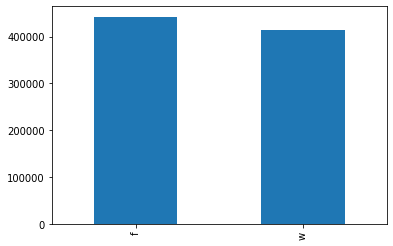

In [44]:
#initial_list_status Count status
initial_list_status_count = data['initial_list_status'].value_counts()
print(initial_list_status_count)
initial_list_status_count.plot.bar()

initial_list_status  default_ind
f                    0              408954
                     1               33601
w                    0              400548
                     1               12866
Name: default_ind, dtype: int64


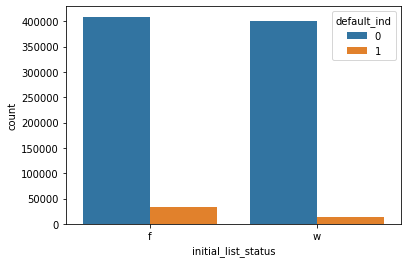

In [45]:
initial_list_status_default = data.groupby('initial_list_status')['default_ind'].value_counts()
print(initial_list_status_default)
sns.countplot('initial_list_status',data=data,hue='default_ind')

### last_pymnt_d

In [46]:
data.last_pymnt_d.nunique()

97

In [47]:
del data['last_pymnt_d']

### Next_pymnt_d

In [48]:
data.next_pymnt_d.nunique()

3

Feb-2016    534094
NaN         252971
Jan-2016     68838
Mar-2016        66
Name: next_pymnt_d, dtype: int64


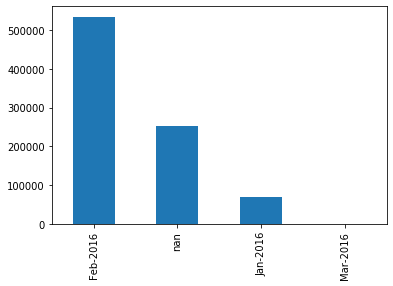

In [49]:
next_pymnt_d_status_count = data['next_pymnt_d'].value_counts(dropna=False)
print(next_pymnt_d_status_count)
next_pymnt_d_status_count.plot.bar()

In [50]:
## Imputing missing values with most repeated value
data['next_pymnt_d'].fillna(value=data['next_pymnt_d'].value_counts().index[0],axis=0,inplace=True)

Feb-2016    787065
Jan-2016     68838
Mar-2016        66
Name: next_pymnt_d, dtype: int64


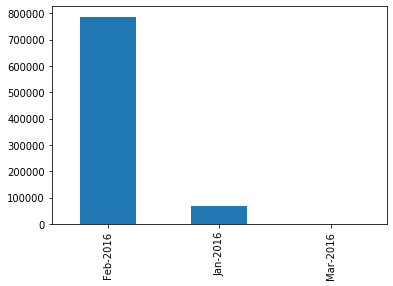

In [51]:
next_pymnt_d_status_count = data['next_pymnt_d'].value_counts(dropna=False)
print(next_pymnt_d_status_count)
next_pymnt_d_status_count.plot.bar()

next_pymnt_d  default_ind
Feb-2016      0              740660
              1               46405
Jan-2016      0               68776
              1                  62
Mar-2016      0                  66
Name: default_ind, dtype: int64


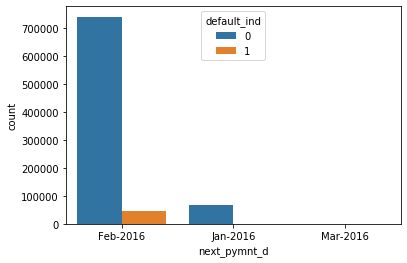

In [52]:
next_pymnt_d_default = data.groupby('next_pymnt_d')['default_ind'].value_counts()
print(next_pymnt_d_default)
sns.countplot('next_pymnt_d',data=data,hue='default_ind')

### last_credit_pull_d

In [53]:
data.last_credit_pull_d.nunique()

102

In [54]:
del data['last_credit_pull_d']

### Application_type

In [55]:
data.application_type.nunique()

2

INDIVIDUAL    855527
JOINT            442
Name: application_type, dtype: int64


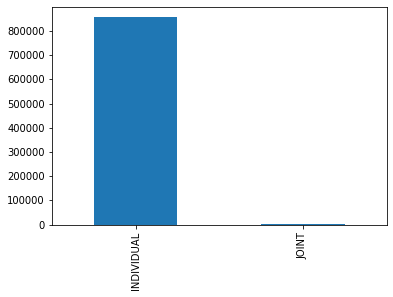

In [56]:
application_type_count = data['application_type'].value_counts()
print(application_type_count)
application_type_count.plot.bar()

application_type  default_ind
INDIVIDUAL        0              809060
                  1               46467
JOINT             0                 442
Name: default_ind, dtype: int64


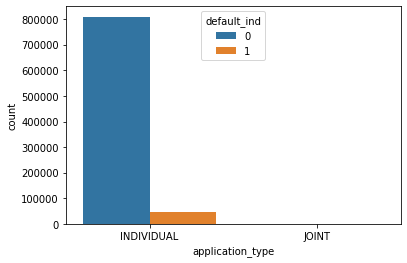

In [57]:
application_type_default = data.groupby('application_type')['default_ind'].value_counts()
print(application_type_default)
sns.countplot('application_type',data=data,hue='default_ind')

## Numerical variables

In [58]:
data.corr()['default_ind']

loan_amnt                     -0.004907
funded_amnt                   -0.005797
funded_amnt_inv               -0.008209
int_rate                       0.155037
installment                    0.004753
annual_inc                    -0.037066
dti                            0.004429
delinq_2yrs                   -0.009186
inq_last_6mths                 0.074407
mths_since_last_delinq         0.001317
open_acc                      -0.021698
pub_rec                       -0.019607
revol_bal                     -0.020696
revol_util                     0.044497
total_acc                     -0.021087
out_prncp                     -0.225960
out_prncp_inv                 -0.225959
total_pymnt                   -0.039220
total_pymnt_inv               -0.040232
total_rec_prncp               -0.090336
total_rec_int                  0.046050
total_rec_late_fee             0.140760
recoveries                     0.475738
collection_recovery_fee        0.330764
last_pymnt_amnt               -0.087217


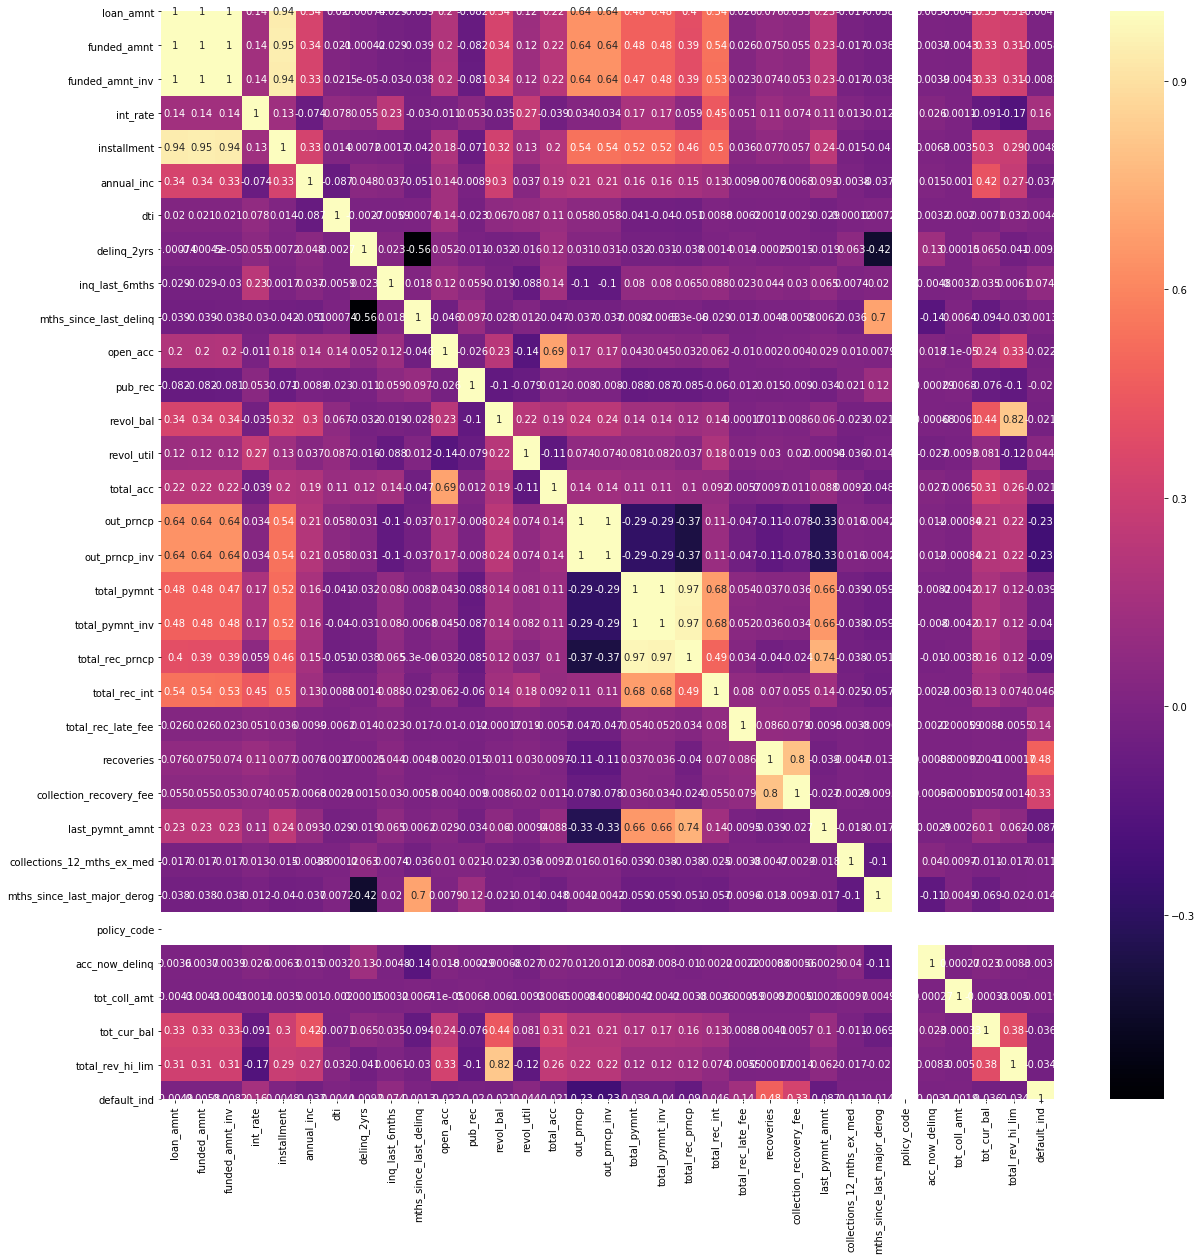

In [59]:
## Correlation matrix
fig13=plt.figure(figsize=(20,20))
sns.heatmap(data.corr(),annot=True,cmap='magma')

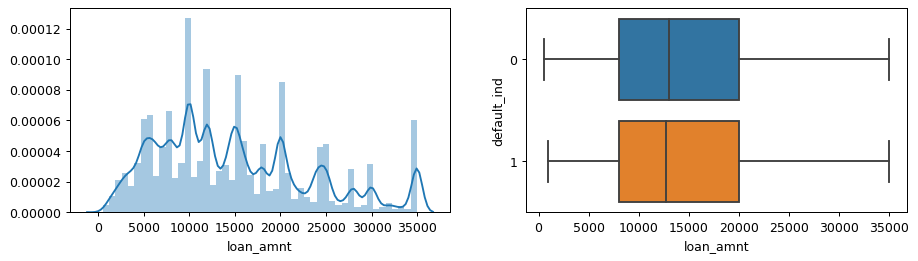

In [60]:
f,(ax1,ax2)=plt.subplots(nrows=1,ncols=2,figsize=(12,3),dpi=90)
sns.distplot(data['loan_amnt'],kde=True,ax=ax1)
sns.boxplot(y='default_ind',x='loan_amnt',data=data,orient='h',ax=ax2)

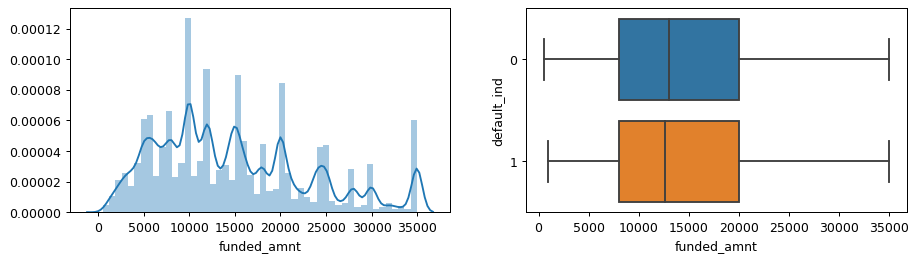

In [61]:
f,(ax1,ax2)=plt.subplots(nrows=1,ncols=2,figsize=(12,3),dpi=90)
sns.distplot(data['funded_amnt'],kde=True,ax=ax1)
sns.boxplot(y='default_ind',x='funded_amnt',data=data,orient='h',ax=ax2)

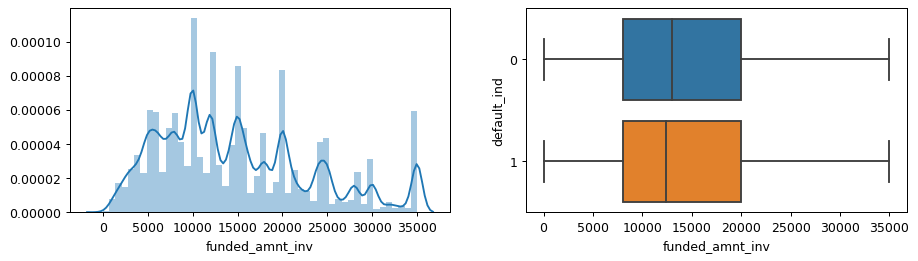

In [62]:
f,(ax1,ax2)=plt.subplots(nrows=1,ncols=2,figsize=(12,3),dpi=90)
sns.distplot(data['funded_amnt_inv'],kde=True,ax=ax1)
sns.boxplot(y='default_ind',x='funded_amnt_inv',data=data,orient='h',ax=ax2)

In [63]:
##Finding correlation
data[['loan_amnt','funded_amnt','funded_amnt_inv','default_ind']].corr()

,loan_amnt,funded_amnt,funded_amnt_inv,default_ind
loan_amnt,1.000000,0.999265,0.997601,-0.004907
funded_amnt,0.999265,1.000000,0.998485,-0.005797
funded_amnt_inv,0.997601,0.998485,1.000000,-0.008209
default_ind,-0.004907,-0.005797,-0.008209,1.000000


In [64]:
del data['funded_amnt']
del data['funded_amnt_inv']

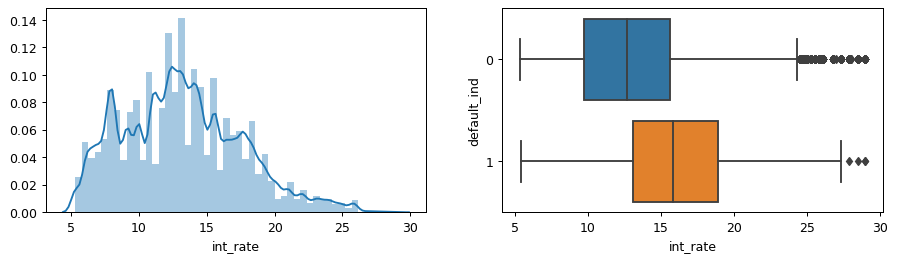

In [65]:
f,(ax1,ax2)=plt.subplots(nrows=1,ncols=2,figsize=(12,3),dpi=90)
sns.distplot(data['int_rate'],kde=True,ax=ax1)
sns.boxplot(y='default_ind',x='int_rate',data=data,orient='h',ax=ax2)

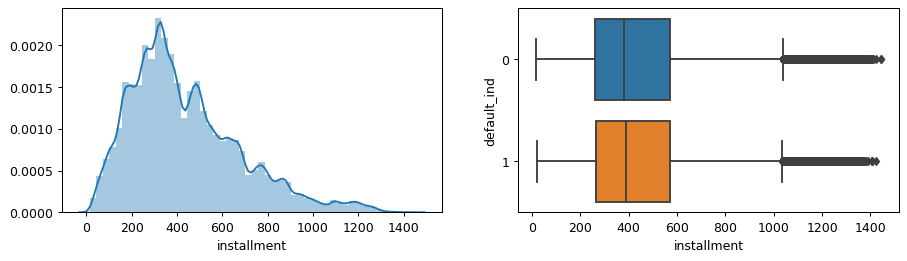

In [66]:
f,(ax1,ax2)=plt.subplots(nrows=1,ncols=2,figsize=(12,3),dpi=90)
sns.distplot(data['installment'],kde=True,ax=ax1)
sns.boxplot(y='default_ind',x='installment',data=data,orient='h',ax=ax2)

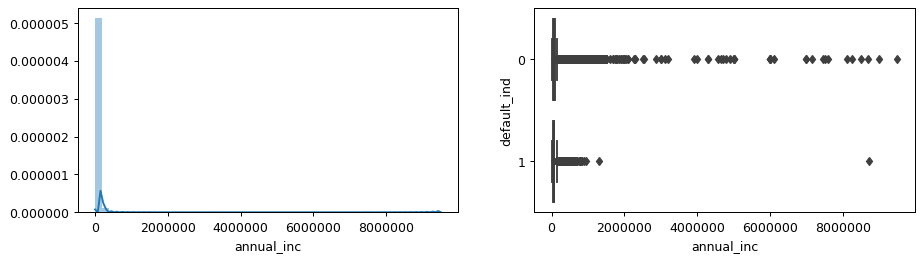

In [67]:
f,(ax1,ax2)=plt.subplots(nrows=1,ncols=2,figsize=(12,3),dpi=90)
sns.distplot(data['annual_inc'],kde=True,ax=ax1)
sns.boxplot(y='default_ind',x='annual_inc',data=data,orient='h',ax=ax2)

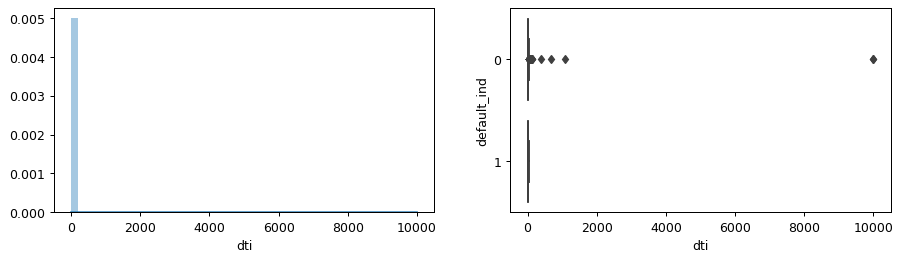

In [68]:
f,(ax1,ax2)=plt.subplots(nrows=1,ncols=2,figsize=(12,3),dpi=90)
sns.distplot(data['dti'],kde=True,ax=ax1)
sns.boxplot(y='default_ind',x='dti',data=data,orient='h',ax=ax2)

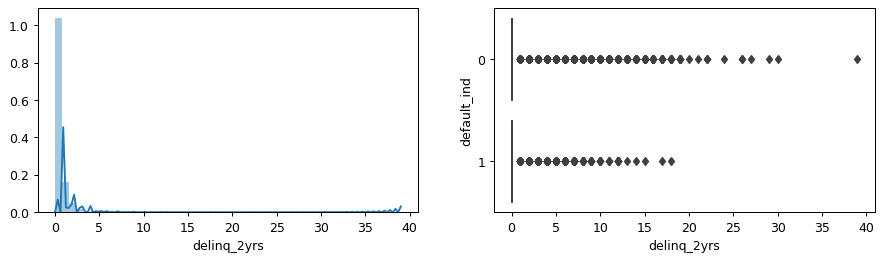

In [69]:
f,(ax1,ax2)=plt.subplots(nrows=1,ncols=2,figsize=(12,3),dpi=90)
sns.distplot(data['delinq_2yrs'],kde=True,ax=ax1)
sns.boxplot(y='default_ind',x='delinq_2yrs',data=data,orient='h',ax=ax2)

In [70]:
data[['dti','delinq_2yrs','default_ind']].corr()

,dti,delinq_2yrs,default_ind
dti,1.000000,-0.002677,0.004429
delinq_2yrs,-0.002677,1.000000,-0.009186
default_ind,0.004429,-0.009186,1.000000


In [71]:
##Due to low correlation with dependent variable,removing these features
del data['dti']
del data['delinq_2yrs']

In [72]:
data.inq_last_6mths.value_counts()

0.0    482665
1.0    232983
2.0     90479
3.0     35902
4.0      9589
5.0      3359
6.0       922
7.0        48
8.0        22
Name: inq_last_6mths, dtype: int64

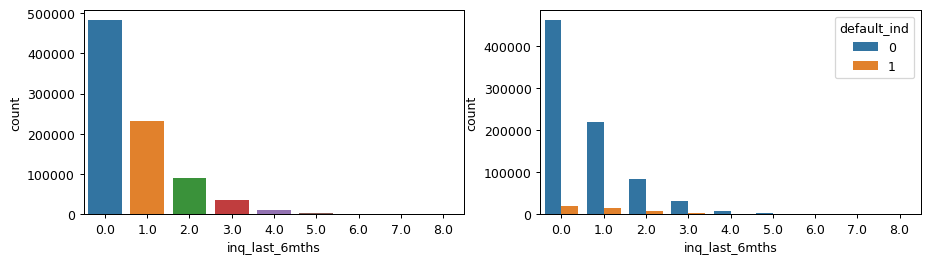

In [73]:
f,(ax1,ax2)=plt.subplots(nrows=1,ncols=2,figsize=(12,3),dpi=90)
sns.countplot(data['inq_last_6mths'],ax=ax1)
sns.countplot('inq_last_6mths',hue='default_ind',data=data,ax=ax2)

In [74]:
data.mths_since_last_delinq.nunique()

155

In [75]:
del data['mths_since_last_delinq']

In [76]:
data.open_acc.unique()

array([ 3.,  2., 10., 15.,  9.,  7.,  4., 11., 14., 12., 20.,  8.,  6.,
       17.,  5., 13., 16., 30., 21., 18., 19., 27., 23., 34., 25., 22.,
       24., 26., 32., 28., 29., 33., 31., 39., 35., 36., 38., 44., 41.,
       42., 40.,  1., 37., 45., 49., 53., 51., 43.,  0., 62., 46., 48.,
       50., 52., 47., 58., 55., 84., 75., 54., 76., 61., 65., 67., 57.,
       66., 68., 70., 60., 56., 82., 63., 59., 64., 79., 74., 90.])

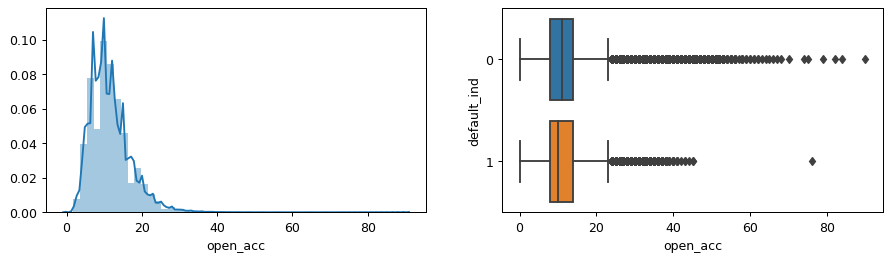

In [77]:
f,(ax1,ax2)=plt.subplots(nrows=1,ncols=2,figsize=(12,3),dpi=90)
sns.distplot(data['open_acc'],kde=True,ax=ax1)
sns.boxplot(x='open_acc',y='default_ind',data=data,orient='h',ax=ax2)

In [78]:
data.pub_rec.value_counts()

0.0     725455
1.0     108920
2.0      14250
3.0       4305
4.0       1496
5.0        728
6.0        366
7.0        167
8.0        110
9.0         46
10.0        41
11.0        21
12.0        14
13.0        12
15.0         6
18.0         5
16.0         5
21.0         4
17.0         3
14.0         2
19.0         2
49.0         2
40.0         1
26.0         1
63.0         1
22.0         1
28.0         1
86.0         1
34.0         1
23.0         1
54.0         1
Name: pub_rec, dtype: int64

In [79]:
data.revol_bal.value_counts()

0.0         3194
5235.0        70
5466.0        70
8696.0        66
4479.0        66
            ... 
56185.0        1
165672.0       1
80049.0        1
224734.0       1
68615.0        1
Name: revol_bal, Length: 72779, dtype: int64

In [80]:
data.revol_util.value_counts()

0.00      3361
58.00     1723
53.00     1702
59.00     1694
61.00     1684
          ... 
153.00       1
125.60       1
152.50       1
17.78        1
120.80       1
Name: revol_util, Length: 1338, dtype: int64

In [81]:
data['revol_util'].fillna(value=data['revol_util'].mean(),inplace=True)

In [82]:
##finding correlation 
data[['revol_bal','revol_util','total_acc','default_ind']].corr()

,revol_bal,revol_util,total_acc,default_ind
revol_bal,1.000000,0.217618,0.189322,-0.020696
revol_util,0.217618,1.000000,-0.114583,0.044475
total_acc,0.189322,-0.114583,1.000000,-0.021087
default_ind,-0.020696,0.044475,-0.021087,1.000000


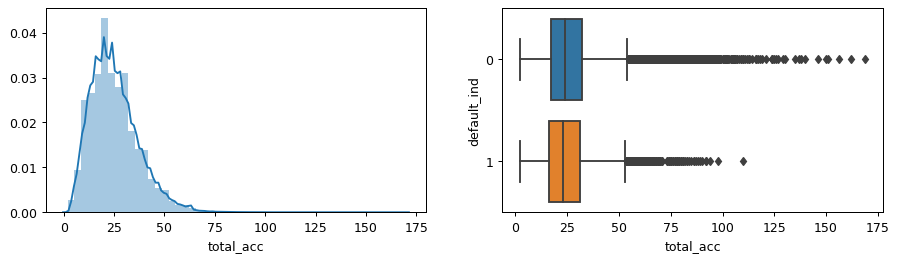

In [83]:
f,(ax1,ax2)=plt.subplots(nrows=1,ncols=2,figsize=(12,3),dpi=90)
sns.distplot(data['total_acc'],kde=True,ax=ax1)
sns.boxplot(x='total_acc',y='default_ind',data=data,orient='h',ax=ax2)

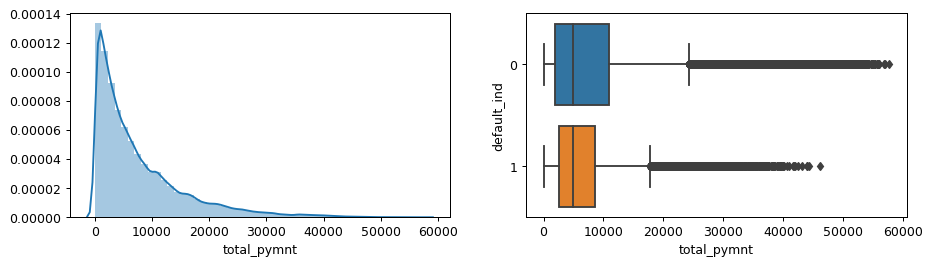

In [84]:
f,(ax1,ax2)=plt.subplots(nrows=1,ncols=2,figsize=(12,3),dpi=90)
sns.distplot(data['total_pymnt'],kde=True,ax=ax1)
sns.boxplot(x='total_pymnt',y='default_ind',data=data,orient='h',ax=ax2)

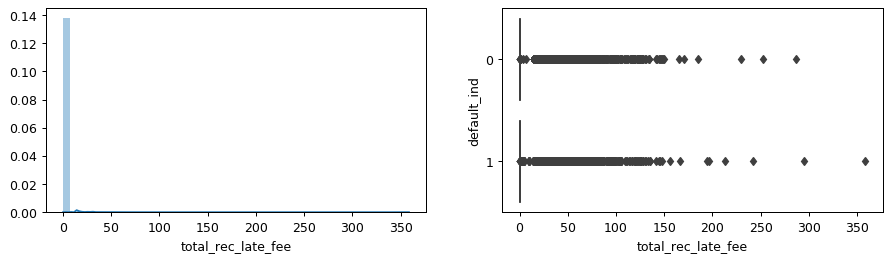

In [85]:
f,(ax1,ax2)=plt.subplots(nrows=1,ncols=2,figsize=(12,3),dpi=90)
sns.distplot(data['total_rec_late_fee'],kde=True,ax=ax1)
sns.boxplot(x='total_rec_late_fee',y='default_ind',data=data,orient='h',ax=ax2)

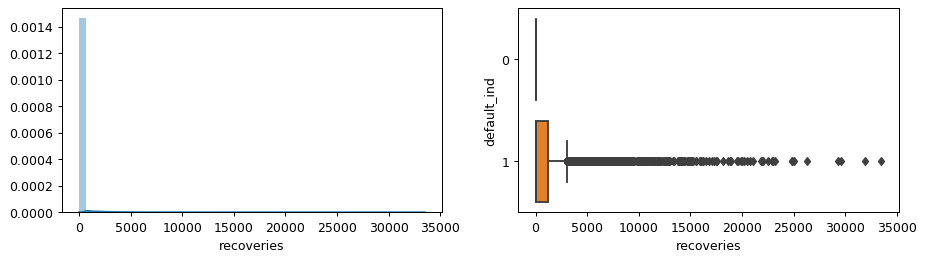

In [86]:
f,(ax1,ax2)=plt.subplots(nrows=1,ncols=2,figsize=(12,3),dpi=90)
sns.distplot(data['recoveries'],kde=True,ax=ax1)
sns.boxplot(x='recoveries',y='default_ind',data=data,orient='h',ax=ax2)

In [87]:
data.recoveries.value_counts(dropna=False)

0.00       831782
200.00         10
14.28           9
11.70           9
100.00          8
            ...  
403.16          1
919.24          1
2256.15         1
1005.64         1
317.31          1
Name: recoveries, Length: 22627, dtype: int64

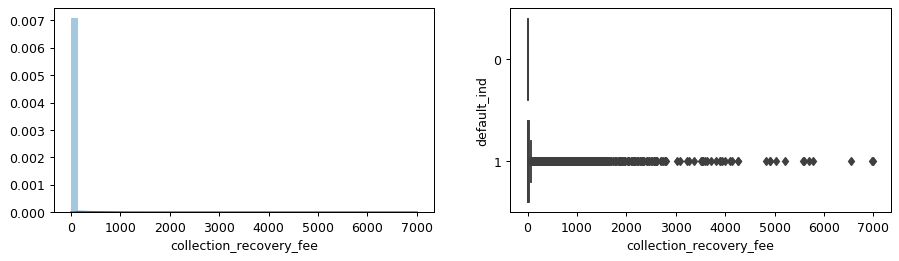

In [88]:
f,(ax1,ax2)=plt.subplots(nrows=1,ncols=2,figsize=(12,3),dpi=90)
sns.distplot(data['collection_recovery_fee'],kde=True,ax=ax1)
sns.boxplot(x='collection_recovery_fee',y='default_ind',data=data,orient='h',ax=ax2)

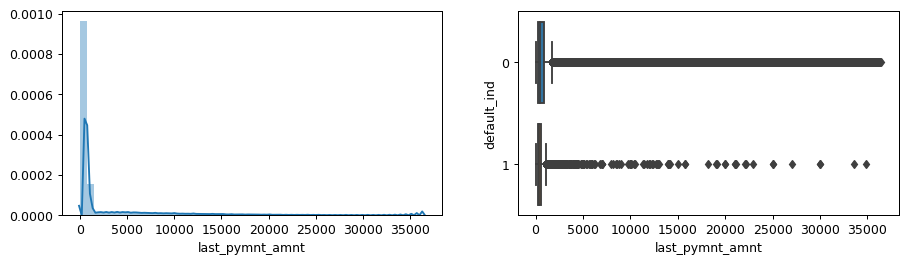

In [89]:
f,(ax1,ax2)=plt.subplots(nrows=1,ncols=2,figsize=(12,3),dpi=90)
sns.distplot(data['last_pymnt_amnt'],kde=True,ax=ax1)
sns.boxplot(x='last_pymnt_amnt',y='default_ind',data=data,orient='h',ax=ax2)

In [90]:
data.collections_12_mths_ex_med.value_counts(dropna=False)

0.0     844768
1.0      10320
2.0        709
3.0         80
NaN         56
4.0         22
5.0          7
6.0          2
7.0          1
16.0         1
20.0         1
14.0         1
10.0         1
Name: collections_12_mths_ex_med, dtype: int64

In [91]:
data.last_pymnt_amnt.value_counts(dropna=False)

0.00        8867
327.34      2053
318.79      1767
312.86      1437
392.81      1374
            ... 
11745.35       1
10513.52       1
30.49          1
16157.33       1
30509.49       1
Name: last_pymnt_amnt, Length: 230321, dtype: int64

In [92]:
del data['collections_12_mths_ex_med']

In [93]:
data.mths_since_last_major_derog.nunique()

167

In [94]:
data.mths_since_last_major_derog.value_counts(dropna=False)

NaN      642830
45.0       3360
42.0       3317
46.0       3287
48.0       3265
          ...  
188.0         1
165.0         1
162.0         1
156.0         1
171.0         1
Name: mths_since_last_major_derog, Length: 168, dtype: int64

In [95]:
del data['mths_since_last_major_derog']
del data['policy_code']

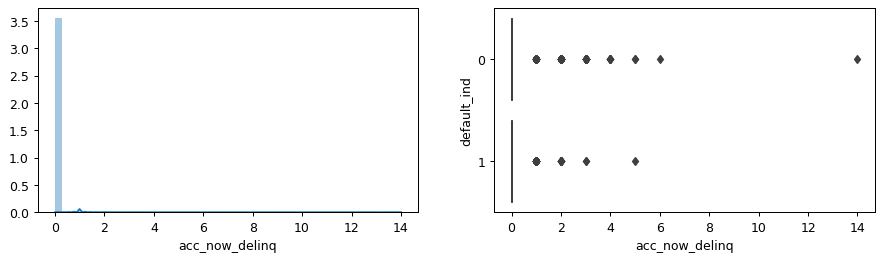

In [96]:
f,(ax1,ax2)=plt.subplots(nrows=1,ncols=2,figsize=(12,3),dpi=90)
sns.distplot(data['acc_now_delinq'],kde=True,ax=ax1)
sns.boxplot(x='acc_now_delinq',y='default_ind',data=data,orient='h',ax=ax2)

/Users/kranti4871/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/kranti4871/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/Users/kranti4871/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/Users/kranti4871/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


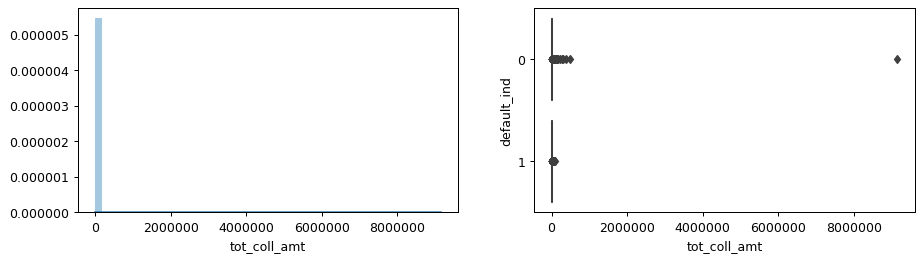

In [97]:
f,(ax1,ax2)=plt.subplots(nrows=1,ncols=2,figsize=(12,3),dpi=90)
sns.distplot(data['tot_coll_amt'],kde=True,ax=ax1)
sns.boxplot(x='tot_coll_amt',y='default_ind',data=data,orient='h',ax=ax2)

In [98]:
#mean imputation
data['tot_cur_bal'].fillna(value=data['tot_cur_bal'].mean(),axis=0,inplace=True)

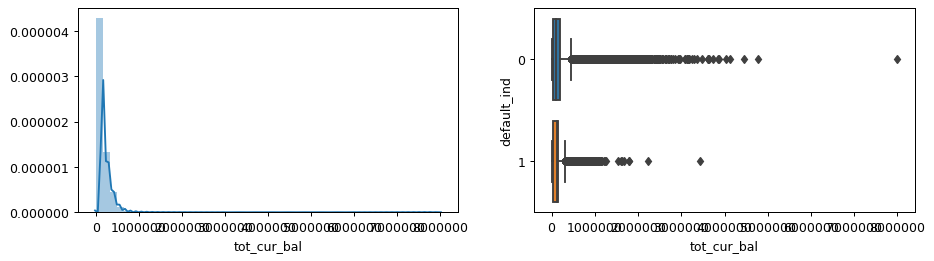

In [99]:
f,(ax1,ax2)=plt.subplots(nrows=1,ncols=2,figsize=(12,3),dpi=90)
sns.distplot(data['tot_cur_bal'],kde=True,ax=ax1)
sns.boxplot(x='tot_cur_bal',y='default_ind',data=data,orient='h',ax=ax2)

In [100]:
#mean imputation
data['total_rev_hi_lim'].fillna(value=data['total_rev_hi_lim'].mean(),axis=0,inplace=True)

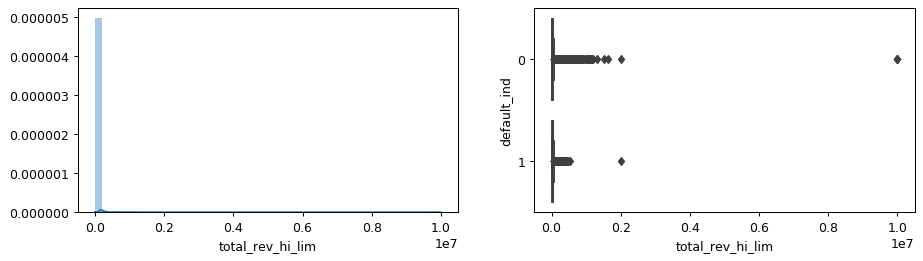

In [101]:
f,(ax1,ax2)=plt.subplots(nrows=1,ncols=2,figsize=(12,3),dpi=90)
sns.distplot(data['total_rev_hi_lim'],kde=True,ax=ax1)
sns.boxplot(x='total_rev_hi_lim',y='default_ind',data=data,orient='h',ax=ax2)

In [102]:
##Finding correlation
data[['acc_now_delinq','tot_coll_amt','tot_cur_bal','total_rev_hi_lim','default_ind']].corr()

,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,default_ind
acc_now_delinq,1.000000,0.000267,0.022800,0.008253,-0.003116
tot_coll_amt,0.000267,1.000000,-0.000331,-0.005025,-0.001921
tot_cur_bal,0.022800,-0.000331,1.000000,0.384867,-0.032310
total_rev_hi_lim,0.008253,-0.005025,0.384867,1.000000,-0.029896
default_ind,-0.003116,-0.001921,-0.032310,-0.029896,1.000000


In [103]:
##due to low correlation with dependent variable,removing these features
del data['acc_now_delinq']
del data['tot_coll_amt']

In [104]:
#Checking for count of null values for each column
null2=data.isnull().sum()
null2

loan_amnt                  0
term                       0
int_rate                   0
installment                0
grade                      0
emp_length                 0
home_ownership             0
annual_inc                 0
verification_status        0
issue_d                    0
purpose                    0
inq_last_6mths             0
open_acc                   0
pub_rec                    0
revol_bal                  0
revol_util                 0
total_acc                  0
initial_list_status        0
out_prncp                  0
out_prncp_inv              0
total_pymnt                0
total_pymnt_inv            0
total_rec_prncp            0
total_rec_int              0
total_rec_late_fee         0
recoveries                 0
collection_recovery_fee    0
last_pymnt_amnt            0
next_pymnt_d               0
application_type           0
tot_cur_bal                0
total_rev_hi_lim           0
default_ind                0
dtype: int64

In [105]:
data.shape

(855969, 33)

# Creating Dummy Variables

In [106]:
Term=pd.get_dummies(data['term'],drop_first=True)
Grade=pd.get_dummies(data['grade'],drop_first=True)
Emp_length=pd.get_dummies(data['emp_length'],drop_first=True)
Home_ownership=pd.get_dummies(data['home_ownership'],drop_first=True)
Verification=pd.get_dummies(data['verification_status'],drop_first=True)
Purpose=pd.get_dummies(data['purpose'],drop_first=True)
Initial_list=pd.get_dummies(data['initial_list_status'],drop_first=True)
Next_pymnt_d=pd.get_dummies(data['next_pymnt_d'],drop_first=True)
Application=pd.get_dummies(data['application_type'],drop_first=True)

In [108]:
##Dropping old object type columns
data.drop(['term','grade','emp_length','home_ownership','verification_status','purpose',
                'initial_list_status','next_pymnt_d','application_type'],
               inplace=True,axis=1)

In [109]:
##joining dataframe with newly created dummy variables using concatenation function
data=pd.concat([data,Term,Grade,Emp_length,Home_ownership,Verification,Purpose,
                     Initial_list,Next_pymnt_d,Application],axis=1)

In [110]:
#checking for new shape of dataframe
data.shape

(855969, 65)

# Train Test Split

In [111]:
train = data[data['issue_d'] < '2015-6-01']
test = data[data['issue_d'] >= '2015-6-01']

In [112]:
train.shape,test.shape

((598978, 65), (256991, 65))

In [113]:
print(train.default_ind.value_counts())
print(test.default_ind.value_counts())

0    552822
1     46156
Name: default_ind, dtype: int64
0    256680
1       311
Name: default_ind, dtype: int64


In [114]:
##Deleting issue_d
del train['issue_d']
del test['issue_d']

In [115]:
X_train = train.drop(['default_ind'],axis=1)
Y_train = train['default_ind']
X_test = test.drop(['default_ind'],axis=1)
Y_test = test['default_ind']

# Logmodel

In [116]:
logreg=LogisticRegression()
logreg.fit(X_train,Y_train)

/Users/kranti4871/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [117]:
y_pred=logreg.predict(X_test)

In [118]:
confusion_matrix = metrics.confusion_matrix(Y_test,y_pred)
print(confusion_matrix)

[[256652     28]
 [    64    247]]


In [119]:
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    256680
           1       0.90      0.79      0.84       311

    accuracy                           1.00    256991
   macro avg       0.95      0.90      0.92    256991
weighted avg       1.00      1.00      1.00    256991



In [120]:
print("precision score is",precision_score(Y_test,y_pred))
print("recall is",recall_score(Y_test,y_pred))
print("F1_score is",f1_score(Y_test,y_pred))

precision score is 0.8981818181818182
recall is 0.7942122186495176
F1_score is 0.8430034129692832


In [121]:
print(roc_auc_score(Y_test,y_pred))

0.8970515667035962


In [122]:
fpr,tpr,thresholds=roc_curve(Y_test,y_pred)

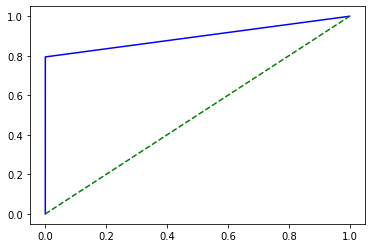

In [123]:
plt.plot(fpr,tpr,color='blue',label='ROC')
plt.plot([0,1],[0,1],color='green',linestyle='--')

In [124]:
print(cross_val_score(logreg,X=X_train,y=Y_train,cv=5,scoring='accuracy'))

/Users/kranti4871/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/kranti4871/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modu

[0.9875121  0.99735383 0.99176099 0.9951417  0.99504153]


/Users/kranti4871/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


# Random Forest

In [125]:
rf=RandomForestClassifier(n_estimators=100,criterion='gini',
                          min_samples_leaf=3,oob_score=False,
                          max_features=2,
                          random_state=101)

In [126]:
rf.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=2,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=101,
                       verbose=0, warm_start=False)

In [127]:
predictions = rf.predict(X_test)

In [128]:
confusion_matrix = metrics.confusion_matrix(Y_test,predictions)
print(confusion_matrix)

[[245588  11092]
 [    56    255]]


In [129]:
print("precision score is",precision_score(Y_test,predictions))
print("recall is",recall_score(Y_test,predictions))
print("F1_score is",f1_score(Y_test,predictions))

precision score is 0.022472900326077377
recall is 0.819935691318328
F1_score is 0.04374678332475553


In [130]:
print(roc_auc_score(Y_test,predictions))

0.8883611758757761


In [131]:
fpr,tpr,thresholds=roc_curve(Y_test,predictions)

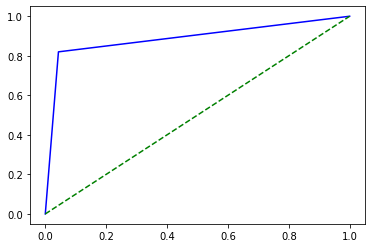

In [132]:
plt.plot(fpr,tpr,color='blue',label='ROC')
plt.plot([0,1],[0,1],color='green',linestyle='--')

# DESCISON TREE

In [133]:
dtree = DecisionTreeClassifier(criterion="entropy", max_depth=7)

In [134]:
dtree.fit(X_train,Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [135]:
pred = dtree.predict(X_test)

In [136]:
print(classification_report(Y_test,pred))

              precision    recall  f1-score   support

           0       1.00      0.69      0.82    256680
           1       0.00      0.94      0.01       311

    accuracy                           0.69    256991
   macro avg       0.50      0.81      0.41    256991
weighted avg       1.00      0.69      0.81    256991



In [137]:
confusion_matrix = metrics.confusion_matrix(Y_test,pred)
print(confusion_matrix)

[[176795  79885]
 [    19    292]]


In [138]:
print("precision score is",precision_score(Y_test,pred))
print("recall is",recall_score(Y_test,pred))
print("F1_score is",f1_score(Y_test,pred))

precision score is 0.0036419422028761365
recall is 0.9389067524115756
F1_score is 0.007255739986084882


In [139]:
print(roc_auc_score(Y_test,pred))

0.8138413300783138


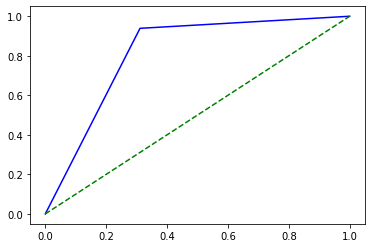

In [140]:
fpr,tpr,thresholds=roc_curve(Y_test,pred)
plt.plot(fpr,tpr,color='blue',label='ROC')
plt.plot([0,1],[0,1],color='green',linestyle='--')

# Treating Imbalanced Data

In [141]:
X = data.drop(['default_ind','issue_d'],axis=1)
y = data['default_ind']

In [142]:
y.value_counts()

0    809502
1     46467
Name: default_ind, dtype: int64

### Random Undersampling

In [143]:
rus = RandomUnderSampler(random_state=0)

In [144]:
X_Usampled, y_Usampled = rus.fit_resample(X, y)

In [145]:
pd.Series(y_Usampled).value_counts()

1    46467
0    46467
Name: default_ind, dtype: int64

### Random Oversampling

In [146]:
ros = RandomOverSampler(random_state=0)
X_Osampled, y_Osampled = ros.fit_resample(X, y)
pd.Series(y_Osampled).value_counts()

1    809502
0    809502
Name: default_ind, dtype: int64

### SMOTE - Synthetic Minority Oversampling Technique

In [147]:
sm = SMOTE(random_state=0)
X_SMOTE, y_SMOTE = sm.fit_resample(X, y)
pd.Series(y_SMOTE).value_counts()

1    809502
0    809502
Name: default_ind, dtype: int64

In [148]:
import sklearn.linear_model as lm
from sklearn.preprocessing import StandardScaler, label_binarize

In [149]:
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
perp_model = lm.Perceptron().fit(X_train_std,Y_train)
y_pred_SC = perp_model.predict(X_test_std)
print("Accuracy: ",round(accuracy_score(Y_test, y_pred_SC),2))

Accuracy:  1.0


In [150]:
print(classification_report(Y_test,y_pred_SC))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    256680
           1       0.21      0.79      0.33       311

    accuracy                           1.00    256991
   macro avg       0.60      0.90      0.67    256991
weighted avg       1.00      1.00      1.00    256991



In [151]:
mat = metrics.confusion_matrix(Y_test,y_pred_SC)
print("Confusion Matrix: \n",mat)
print("precision score is",precision_score(Y_test,y_pred_SC))
print("recall is",recall_score(Y_test,y_pred_SC))
print("F1_score is",f1_score(Y_test,y_pred_SC))

Confusion Matrix: 
 [[255751    929]
 [    64    247]]
precision score is 0.2100340136054422
recall is 0.7942122186495176
F1_score is 0.33221250840618693


In [152]:
sm = SMOTE(random_state=0)
X_SMOTE, y_SMOTE = sm.fit_resample(X_train, Y_train)
sc = StandardScaler()
sc.fit(X_SMOTE)
X_train_std = sc.transform(X_SMOTE)
X_test_std = sc.transform(X_test)
perp_model = lm.Perceptron().fit(X_train_std,y_SMOTE)
y_pred_sm_sc = perp_model.predict(X_test_std)
print("Accuracy: ",round(accuracy_score(Y_test, y_pred_sm_sc),2))

Accuracy:  0.99


In [153]:
mat = metrics.confusion_matrix(Y_test,y_pred_sm_sc)
print("Confusion Matrix: \n",mat)
print("precision score is",precision_score(Y_test,y_pred_sm_sc))
print("recall is",recall_score(Y_test,y_pred_sm_sc))
print("F1_score is",f1_score(Y_test,y_pred_sm_sc))

Confusion Matrix: 
 [[253096   3584]
 [    73    238]]
precision score is 0.06227106227106227
recall is 0.7652733118971061
F1_score is 0.11517057827244133


In [154]:
forest = RandomForestClassifier(n_estimators= 8,criterion="gini", max_depth=5,min_samples_split = 0.4,min_samples_leaf=1, class_weight="balanced")
X_SMOTE, y_SMOTE = sm.fit_resample(X_train, Y_train)
model = forest.fit(X_SMOTE,y_SMOTE)
y_pred_sm_rf = model.predict(X_test)

In [155]:
mat = metrics.confusion_matrix(Y_test,y_pred_sm_sc)
print("Confusion Matrix: \n",mat)
print("precision score is",precision_score(Y_test,y_pred_sm_rf))
print("recall is",recall_score(Y_test,y_pred_sm_rf))
print("F1_score is",f1_score(Y_test,y_pred_sm_rf))

Confusion Matrix: 
 [[253096   3584]
 [    73    238]]
precision score is 0.4050632911392405
recall is 0.4115755627009646
F1_score is 0.4082934609250398


In [156]:
forest = RandomForestClassifier(n_estimators= 8,criterion="gini", max_depth=5,min_samples_split = 0.4,min_samples_leaf=1, class_weight="balanced")
X_Usampled, y_Usampled = rus.fit_resample(X_train, Y_train)
model = forest.fit(X_Usampled,y_Usampled)
y_pred_us_rf = model.predict(X_test)

In [157]:
mat = metrics.confusion_matrix(Y_test,y_pred_us_rf)
print("Confusion Matrix: \n",mat)
print("precision score is",precision_score(Y_test,y_pred_us_rf))
print("recall is",recall_score(Y_test,y_pred_us_rf))
print("F1_score is",f1_score(Y_test,y_pred_us_rf))
print(classification_report(Y_test,y_pred_us_rf))

Confusion Matrix: 
 [[253866   2814]
 [    63    248]]
precision score is 0.08099281515349445
recall is 0.797427652733119
F1_score is 0.14705010376519417
              precision    recall  f1-score   support

           0       1.00      0.99      0.99    256680
           1       0.08      0.80      0.15       311

    accuracy                           0.99    256991
   macro avg       0.54      0.89      0.57    256991
weighted avg       1.00      0.99      0.99    256991



In [158]:
logreg=LogisticRegression()
logreg.fit(X_train,Y_train)
y_pred=logreg.predict(X_test)
fpr_us, tpr_us, _ = roc_curve(Y_test, y_pred)
roc_auc_us = auc(fpr_us, tpr_us)
confusion_matrix = metrics.confusion_matrix(Y_test,y_pred)
print(confusion_matrix)
print(classification_report(Y_test,y_pred))
print("precision score is",precision_score(Y_test,y_pred))
print("recall is",recall_score(Y_test,y_pred))
print("F1_score is",f1_score(Y_test,y_pred))

/Users/kranti4871/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[[256652     28]
 [    64    247]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    256680
           1       0.90      0.79      0.84       311

    accuracy                           1.00    256991
   macro avg       0.95      0.90      0.92    256991
weighted avg       1.00      1.00      1.00    256991

precision score is 0.8981818181818182
recall is 0.7942122186495176
F1_score is 0.8430034129692832


In [159]:
logreg=LogisticRegression()
logreg.fit(X_train,Y_train)
y_pred=logreg.predict(X_test)
confusion_matrix = metrics.confusion_matrix(Y_test,y_pred)
print(confusion_matrix)
print(classification_report(Y_test,y_pred))
print("precision score is",precision_score(Y_test,y_pred))
print("recall is",recall_score(Y_test,y_pred))
print("F1_score is",f1_score(Y_test,y_pred))

/Users/kranti4871/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[[256652     28]
 [    64    247]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    256680
           1       0.90      0.79      0.84       311

    accuracy                           1.00    256991
   macro avg       0.95      0.90      0.92    256991
weighted avg       1.00      1.00      1.00    256991

precision score is 0.8981818181818182
recall is 0.7942122186495176
F1_score is 0.8430034129692832


In [160]:
rus = RandomUnderSampler(random_state=0)
X_Usampled, y_Usampled = rus.fit_resample(X_train, Y_train)
logreg=LogisticRegression()
logreg.fit(X_Usampled,y_Usampled)
y_pred=logreg.predict(X_test)
fpr_us, tpr_us, _ = roc_curve(Y_test, y_pred)
roc_auc_us = auc(fpr_us, tpr_us)
confusion_matrix = metrics.confusion_matrix(Y_test,y_pred)
print(confusion_matrix)
print(classification_report(Y_test,y_pred))
print("precision score is",precision_score(Y_test,y_pred))
print("recall is",recall_score(Y_test,y_pred))
print("F1_score is",f1_score(Y_test,y_pred))

/Users/kranti4871/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[[256569    111]
 [    63    248]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    256680
           1       0.69      0.80      0.74       311

    accuracy                           1.00    256991
   macro avg       0.85      0.90      0.87    256991
weighted avg       1.00      1.00      1.00    256991

precision score is 0.6908077994428969
recall is 0.797427652733119
F1_score is 0.7402985074626866


In [161]:
ros = RandomOverSampler(random_state=0)
X_Osampled, y_Osampled = ros.fit_resample(X_train, Y_train)
logreg=LogisticRegression()
logreg.fit(X_Osampled,y_Osampled)
y_pred=logreg.predict(X_test)
confusion_matrix = metrics.confusion_matrix(Y_test,y_pred)
fpr_os, tpr_os, _ = roc_curve(Y_test, y_pred)
roc_auc_os = auc(fpr_os, tpr_os)
print(confusion_matrix)
print(classification_report(Y_test,y_pred))
print("precision score is",precision_score(Y_test,y_pred))
print("recall is",recall_score(Y_test,y_pred))
print("F1_score is",f1_score(Y_test,y_pred))

/Users/kranti4871/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[[256567    113]
 [    63    248]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    256680
           1       0.69      0.80      0.74       311

    accuracy                           1.00    256991
   macro avg       0.84      0.90      0.87    256991
weighted avg       1.00      1.00      1.00    256991

precision score is 0.6869806094182825
recall is 0.797427652733119
F1_score is 0.738095238095238


In [162]:
sm = SMOTE(random_state=0)
X_SMOTE, y_SMOTE = sm.fit_resample(X_train, Y_train)
logreg=LogisticRegression()
logreg.fit(X_Osampled,y_Osampled)
y_pred=logreg.predict(X_test)
confusion_matrix = metrics.confusion_matrix(Y_test,y_pred)
fpr_smote, tpr_smote, _ = roc_curve(Y_test, y_pred)
roc_auc_smote = auc(fpr_smote, tpr_smote)
print(confusion_matrix)
print(classification_report(Y_test,y_pred))
print("precision score is",precision_score(Y_test,y_pred))
print("recall is",recall_score(Y_test,y_pred))
print("F1_score is",f1_score(Y_test,y_pred))

/Users/kranti4871/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[[256567    113]
 [    63    248]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    256680
           1       0.69      0.80      0.74       311

    accuracy                           1.00    256991
   macro avg       0.84      0.90      0.87    256991
weighted avg       1.00      1.00      1.00    256991

precision score is 0.6869806094182825
recall is 0.797427652733119
F1_score is 0.738095238095238
